## Random forest usimg grid search

### Methodology


*   ###### **Data Cleaning:** Checking for null values and based on their number either dropping them or replacing with mean, median, mode based on the type and description of data. Also converting the data types of values in correct format, like for price the given type is object so need to convert this to float.
*   ###### **Data Visualization:** This step helps understand the understand the data in a visually. We can understand normality of the data as well. This helps us to decide whether to normalize the data.
*   ###### **Feature Selection:** Based on the Pearson correlation between the labeled column and rest of the features. In general, a very great correlation should have an absolute value greater than 0.75. When the labeled column is depended on multiple columns, the correlation with one column may be less. But combined features may have higher effect.
*   ######  **Train Test Split:** We split the data into 80:20 ratio for tarining testing respectively.
*   ###### **Model Selection:** Based on the data visualization and data correlation, we need to select a model that would best suit. Here we need to use Rnadom forest with grid search.

*   ###### **Evalution:** In this case we are using RMSE, R2 Score to determine the accuracy of the predicting model.



##### importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Reading data

In [ ]:
df=pd.read_json("amsterdam.json")

In [ ]:
df.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

##### converting price to Float dtype

In [ ]:
l=[]
for i in df.price:
  i = i. replace(",", "")
  i= i. replace("$", "")
  l.append(i)

In [ ]:
df.price = l
df.price=pd.to_numeric(df.price)

##### Handling Object dtypes

In [ ]:
df.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                             float64
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [ ]:
c=df.room_type.unique()
for i in range(len(c)):
  df.room_type=df.room_type.replace(c[i],i+1)
df.room_type.unique()

array([1, 2, 3])

In [ ]:
c=df.instant_bookable.unique()
for i in range(len(c)):
  df.instant_bookable=df.instant_bookable.replace(c[i],i+1)
df.instant_bookable.unique()

array([1, 2])

##### Correlation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


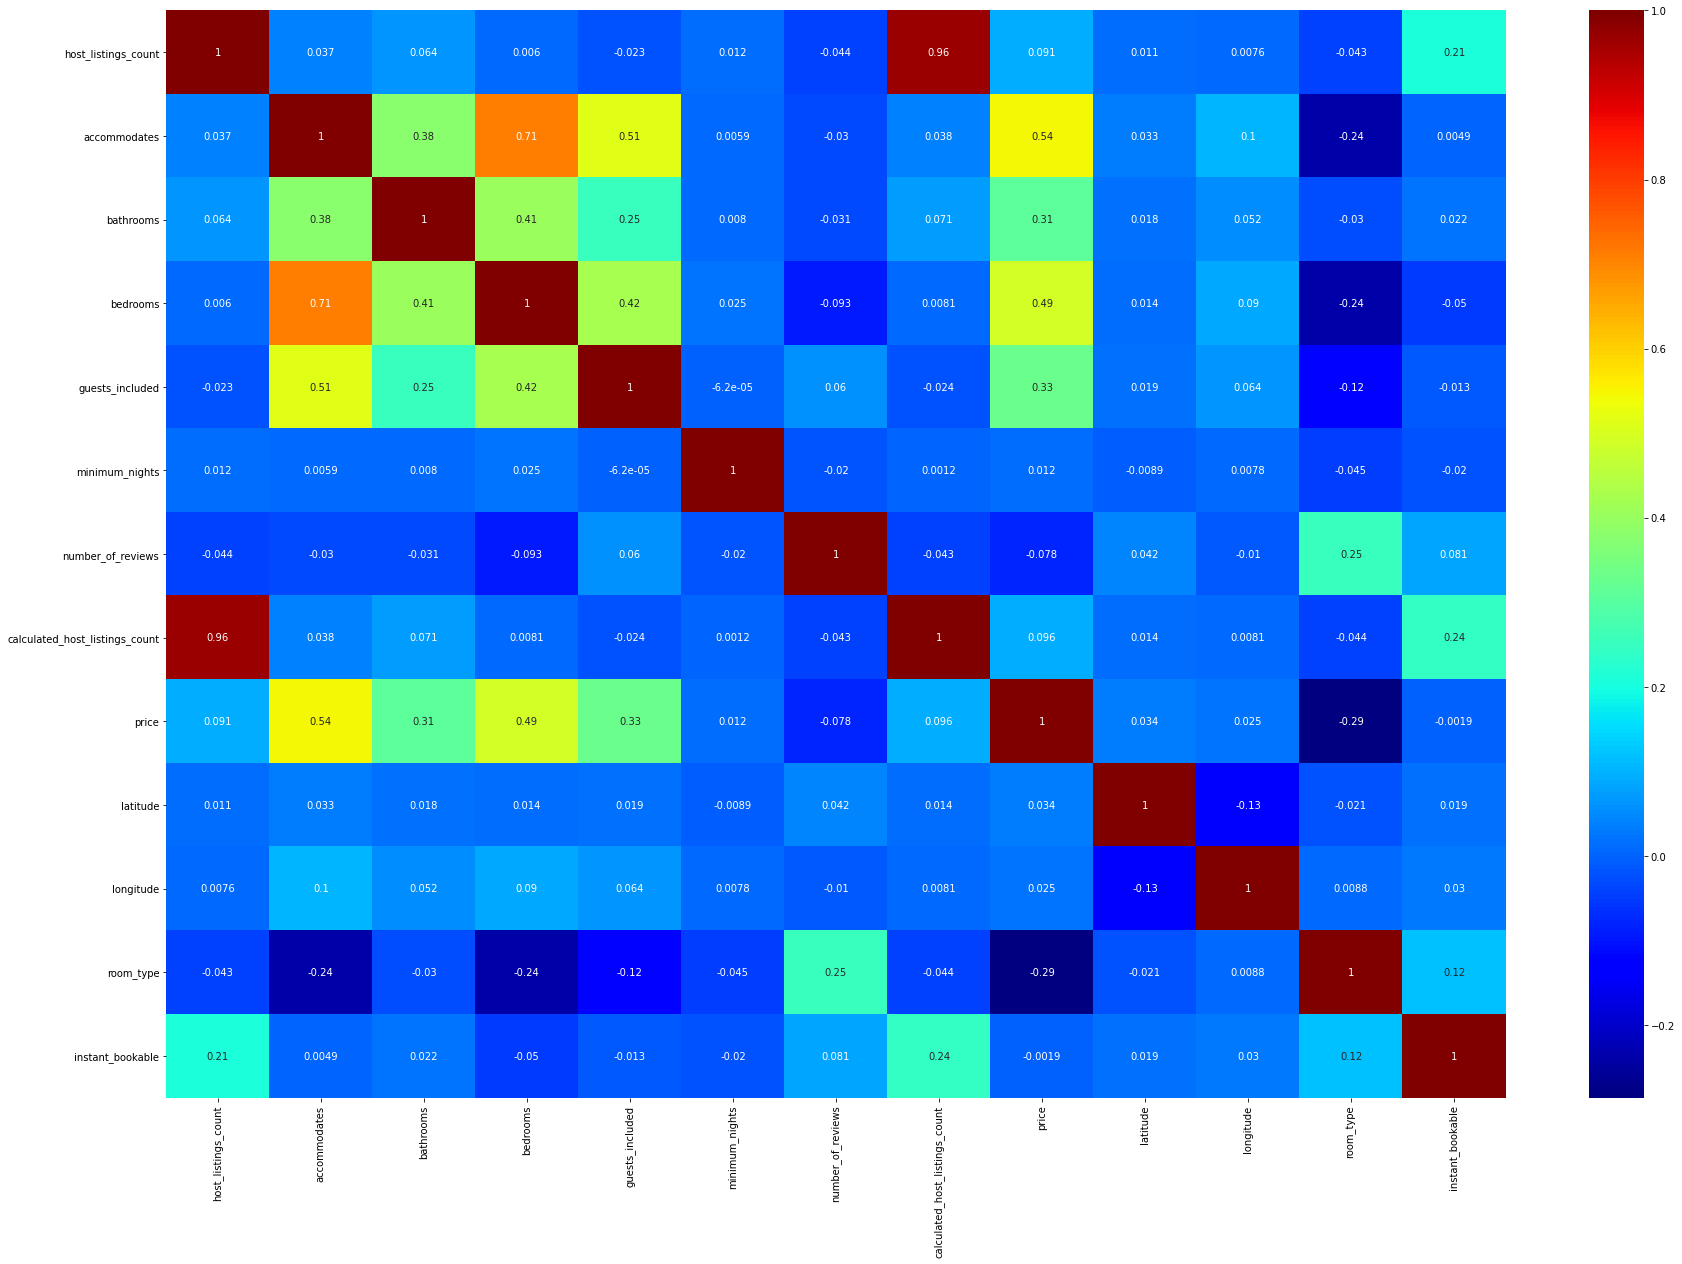

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(method=),annot = True,cmap="jet")

In [ ]:
df.isna().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [ ]:
df_dummies = pd.get_dummies(df['instant_bookable'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['instant_bookable']

In [ ]:
x = df_new.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan]
 [            nan  1.00000000e+00             nan             nan
   5.14682504e-01  5.87121480e-03 -3.02009218e-02  3.84132430e-02
   5.44901517e-01  3.31276199e-02  1.03343457e-01 -2.37635393e-01
  -4.87670839e-03]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan
              nan]
 [            nan  5.14682504e-01             nan             nan
   1.00000000e+00 -6.16408980e-05  6.00838458e-02 -2.44546690e-02


In [ ]:
df_new.corr()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,1
host_listings_count,1.000000,0.036867,0.063513,0.005980,-0.022878,0.011775,-0.043733,0.964988,0.091316,0.011304,0.007564,-0.042631,-0.209244
accommodates,0.036867,1.000000,0.377859,0.709783,0.514683,0.005871,-0.030201,0.038413,0.544902,0.033128,0.103343,-0.237635,-0.004877
bathrooms,0.063513,0.377859,1.000000,0.406100,0.254090,0.008030,-0.030678,0.070874,0.308438,0.018344,0.051923,-0.029531,-0.022101
bedrooms,0.005980,0.709783,0.406100,1.000000,0.424646,0.025018,-0.092510,0.008135,0.492672,0.013913,0.090028,-0.238270,0.050024
guests_included,-0.022878,0.514683,0.254090,0.424646,1.000000,-0.000062,0.060084,-0.024455,0.328058,0.018978,0.064000,-0.122351,0.013308
minimum_nights,0.011775,0.005871,0.008030,0.025018,-0.000062,1.000000,-0.019569,0.001221,0.011706,-0.008922,0.007788,-0.044879,0.019729
number_of_reviews,-0.043733,-0.030201,-0.030678,-0.092510,0.060084,-0.019569,1.000000,-0.042904,-0.077721,0.042087,-0.009969,0.252357,-0.081092
calculated_host_listings_count,0.964988,0.038413,0.070874,0.008135,-0.024455,0.001221,-0.042904,1.000000,0.095842,0.014078,0.008105,-0.044362,-0.242517
price,0.091316,0.544902,0.308438,0.492672,0.328058,0.011706,-0.077721,0.095842,1.000000,0.034090,0.024619,-0.285875,0.001926
latitude,0.011304,0.033128,0.018344,0.013913,0.018978,-0.008922,0.042087,0.014078,0.034090,1.000000,-0.128556,-0.020514,-0.018813
